# Support Vector Machine

El objetivo del algoritmo de SVM es poder encontrar un hiperplano en un espacio de N dimensiones siendo N - el número de características) que clasifica claramente los puntos de datos.

![image.png](hiperplano.png)
![image.png](hiperplano2.png)

Para separar las dos clases de puntos de datos, hay muchos hiperplanos posibles que podrían elegirse. Nuestro objetivo es encontrar un plano que tenga el margen máximo, es decir, la distancia máxima entre puntos de datos de ambas clases. Maximizar la distancia de margen proporciona cierto refuerzo para que los puntos de datos futuros se puedan clasificar con más confianza.


![image.png](hiperplano3.png)

Los hiperplanos son límites de decisión que ayudan a clasificar los puntos de datos. Los puntos de datos que caen a ambos lados del hiperplano se pueden atribuir a diferentes clases. Además, la dimensión del hiperplano depende del número de características. Si el número de características de entrada es 2, entonces el hiperplano es solo una línea. Si el número de características de entrada es 3, el hiperplano se convierte en un plano bidimensional. Se hace difícil imaginar cuando el número de características excede 3.


![image.png](supportvectors.jpg)

Los vectores de soporte son puntos de datos que están más cerca del hiperplano e influyen en la posición y orientación del hiperplano. Usando estos vectores de soporte, maximizamos el margen del clasificador. Eliminar los vectores de soporte cambiará la posición del hiperplano. Estos son los puntos que nos ayudan a construir nuestro SVM.

## Función de costo y actualizaciones de gradiente
En el algoritmo SVM, buscamos maximizar el margen entre los puntos de datos y el hiperplano. La función de pérdida que ayuda a maximizar el margen es el hinge loss.


![image.png](lossfunction.png)
[Tomado de](https://www.youtube.com/watch?v=geI6lM5iOl0&feature=youtu.be)
Ahora que tenemos la función de pérdida, tomamos derivadas parciales con respecto a los pesos para encontrar los gradientes. Usando los gradientes, podemos actualizar nuestros parametros.


![image.png](gradients.png)
[Tomado de](https://www.youtube.com/watch?v=geI6lM5iOl0&feature=youtu.be)
## Ventajas y desventajas
### Ventajas:
- SVM funciona relativamente bien cuando hay un claro margen de separación entre clases.
- SVM es más efectivo en espacios de alta dimensión.
- SVM es efectivo en casos donde el número de dimensiones es mayor que el número de muestras.
- SVM es relativamente eficiente en memoria

### Desventajas

- El algoritmo SVM no es adecuado para grandes conjuntos de datos.
- SVM no funciona muy bien, cuando el conjunto de datos tiene más ruido, es decir, las clases objetivo se superponen.
- En los casos en que el número de características para cada punto de datos excede el número de muestra de datos de entrenamiento, el SVM tendrá un rendimiento inferior.
- Como el clasificador de vectores de soporte funciona colocando puntos de datos, encima y debajo del hiperplano de clasificación no hay una explicación probabilística para la clasificación.


## Propiedades

 - Flexibilidad para elegir una función de kernel
 - Mala eleccion de solución cuando se trata de grandes conjuntos de datos.
 - solo se utilizan vectores de soporte para especificar el hiperplano de separación
 - Capacidad para manejar grandes espacios de características
 - la complejidad no depende de la dimensionalidad del espacio de características
 - El sobreajuste se puede controlar mediante un enfoque de margen suave
 - Buena propiedad matemática: un simple problema de optimización convexa que es garantizado para converger en una única solución global
 
 ## Kernel Trick
 
 Hemos visto cómo las transformaciones de dimensiones superiores pueden permitirnos separar datos para hacer predicciones de clasificación. Esto hace parecer que para entrenar un clasificador de vectores de soporte y optimizar nuestra función objetivo, tendríamos que realizar operaciones con los vectores dimensionales más altos en el espacio de características transformado. En aplicaciones reales, puede haber muchas características en los datos y la aplicación de transformaciones que involucren muchas combinaciones polinómicas de estas características conducirá a costos computacionales extremadamente altos y poco prácticos.
 
 
 El Kernel Trick proporciona una solución a este problema. El "truco" es que los métodos del kernel representan los datos solo a través de un conjunto de comparaciones de similitud por pares entre las observaciones de datos originales x con las coordenadas originales en el espacio dimensional inferior, en lugar de aplicar explícitamente las transformaciones ϕ (x) y representar el datos por estas coordenadas transformadas en el espacio de características dimensionales superiores.
 
![image.png](kerneldef.png)

Puede ayudar un poco entender cómo la función del núcleo es igual al producto escalar de los vectores transformados al considerar que cada coordenada del vector transformado ϕ (x) es solo alguna función de las coordenadas en el correspondiente vector de dimensión inferior x.


## Ejemplo con Python y TensorFlow
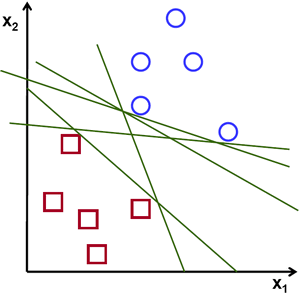

In [3]:
import tensorflow.compat.v1 as tf 
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [22]:
iris = datasets.load_iris()
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [27]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [34]:
# En x se guardaran el largo y ancho de petal
x = iris["data"][:,(2,3)]
# y Guardara la informacion de los que son Setosa
y = (iris["target"]==0).astype(np.float64)

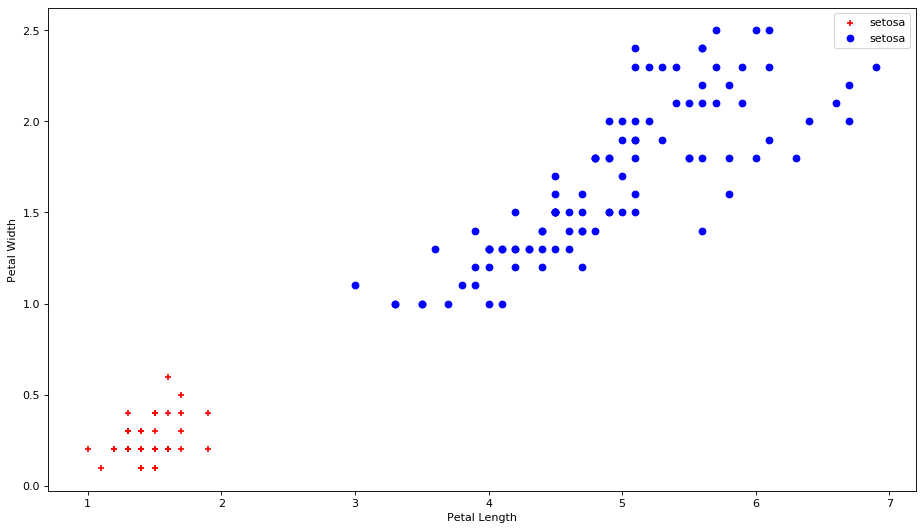

In [45]:
fig = plt.figure(figsize=(14,8), dpi=80, facecolor="w", edgecolor="k")
plt.scatter(x[y==1,0], x[y==1,1], c = 'r',marker = '+', label='setosa')
plt.scatter(x[y==0,0], x[y==0,1], c = 'b',marker = 'o', label='setosa')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()



# Usando Tensorflow para Entrenar el Modelo

In [63]:
def entrenarSVM(x,yp,lr,c,epochs,tag):
    import time
    m,k=x.shape
    tp = np.array([1.0 if z == 1 else -1.0 for z in yp])
    tf.reset_default_graph()
    g=tf.Graph()
    with g.as_default():
        X = tf.placeholder(tf.float32, shape = (m,k), name = 'X')
        y = tf.placeholder(tf.float32, shape = (m,1), name = 'y')
        t = tf.placeholder(tf.float32, shape = (m,1), name = 't')
        
        lr_param = tf.placeholder(tf.float32, name = 'lr')
        c_param = tf.placeholder(tf.float32, name = 'c')
        
        W = tf.Variable(tf.truncated_normal(shape=(k,1), seed = 123), name = 'w')
        b = tf.Variable(tf.truncated_normal(shape=(1,1), seed = 123), name = 'b')
        
        with tf.name_scope('Modelo_SVM'):
            svm_op = tf.add(tf.matmul(X,W), b, name = 'svm_op')
            t_hat = tf.sign(svm_op, name='t_hat')
            
        with tf.name_scope("FCosto"):
            w_norm = tf.multiply(tf.constant(0.5), tf.reduce_sum(tf.square(W)),name ='w_norm')
            classif_term = tf.reduce_sum(tf.maximum(tf.constant(0.),tf.subtract(tf.constant(1.),tf.multiply(t,svm_op))))
            cost=tf.add(w_norm,tf.multiply(c_param, classif_term), name = 'cost')
        
        with tf.name_scope('Accuracy'):
            accuracy = tf.reduce_mean(tf.cast(tf.equal(t_hat, t), tf.float32), name = 'accuracy')
        
        with tf.name_scope('GradienDesc'):
            trainstep = tf.train.GradientDescentOptimizer(lr_param).minimize(cost)
        
        with tf.name_scope('Summaries'):
            costSumm = tf.summary.scalar(name='fCosto', tensor = cost)
            accsumm = tf.summary.scalar(name='accSum', tensor = accuracy)
            summaries = tf.summary.merge_all()
        
        init=tf.global_variables_initializer()
    
    start = time.time()
    
    with tf.Session(graph=g) as sess:
        writer = tf.summary.FileWriter('./graphs/'+str(lr)+str(c)+str(epochs)+str(tag),sess.graph)
        sess.run(init)
        for epoch in range(epochs):
            _,c_,acc_,summ_ = sess.run([trainstep,cost,accuracy,summaries],
                                      feed_dict = {X:x,y:yp.reshape((m,1)),t:tp.reshape((m,1)),
                                                  lr_param:lr,c_param:c})
            writer.add_summary(summ_, epoch +1)
            if ( epoch + 1) % round(epochs*0.1) == 0:
                print('Epoch:'+str(epoch)+' Accuracy:'+str(acc_)+' Costo: '+str(c_))
        
        writer.close()
        w_,b_ = sess.run([W,b])
    return w_, b_

In [64]:
w,b = entrenarSVM(x,y, 0.001,5,1000 , tag ='lineal')

Epoch:99 Accuracy:1.0 Costo: 3.2209883
Epoch:199 Accuracy:1.0 Costo: 1.8481581
Epoch:299 Accuracy:1.0 Costo: 1.5305307
Epoch:399 Accuracy:1.0 Costo: 1.4411502
Epoch:499 Accuracy:1.0 Costo: 1.3903677
Epoch:599 Accuracy:1.0 Costo: 1.3518289
Epoch:699 Accuracy:1.0 Costo: 1.4144276
Epoch:799 Accuracy:1.0 Costo: 1.3146355
Epoch:899 Accuracy:1.0 Costo: 1.2976252
Epoch:999 Accuracy:1.0 Costo: 1.2809134


# Grafica del Plano

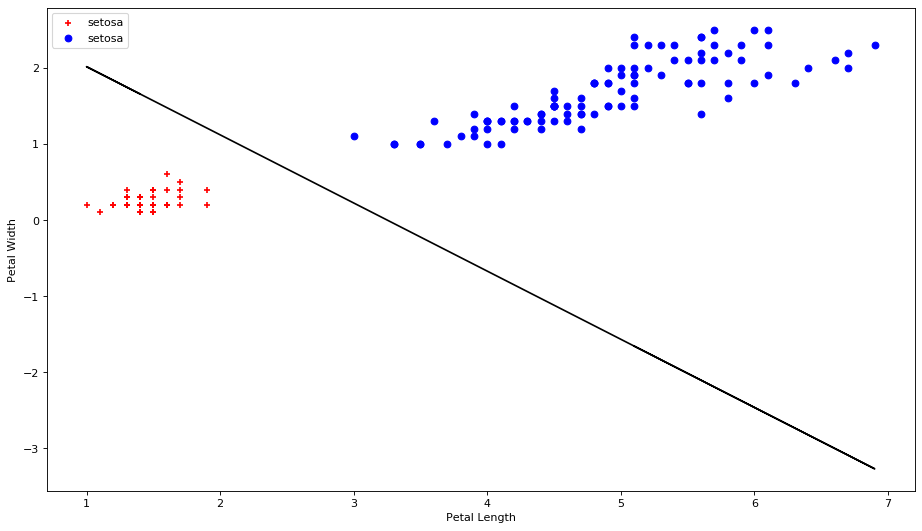

In [66]:
fig = plt.figure(figsize=(14,8), dpi=80, facecolor="w", edgecolor="k")
plt.scatter(x[y==1,0], x[y==1,1], c = 'r',marker = '+', label='setosa')
plt.scatter(x[y==0,0], x[y==0,1], c = 'b',marker = 'o', label='setosa')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

gx = np.array([d[0] for d in x])
m_ = -w[0,0] / w [1,0]
b_ = -b[0] / w[1,0]
ydb = b_ + m_*gx
plt.plot(gx,ydb,'k-', label = "Limite de Plano" )